# Pattern Recognition on Iris Data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

## Data Preparation

### Load the dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X,columns=iris.feature_names)
df['Species'] = y

### Data Preprocessing

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model

### Training

In [5]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [6]:
y_pred = clf.predict(X_test)
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix: 

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [7]:
print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## PCA Visualization

In [8]:
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X)

In [9]:
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca['Species'] = y

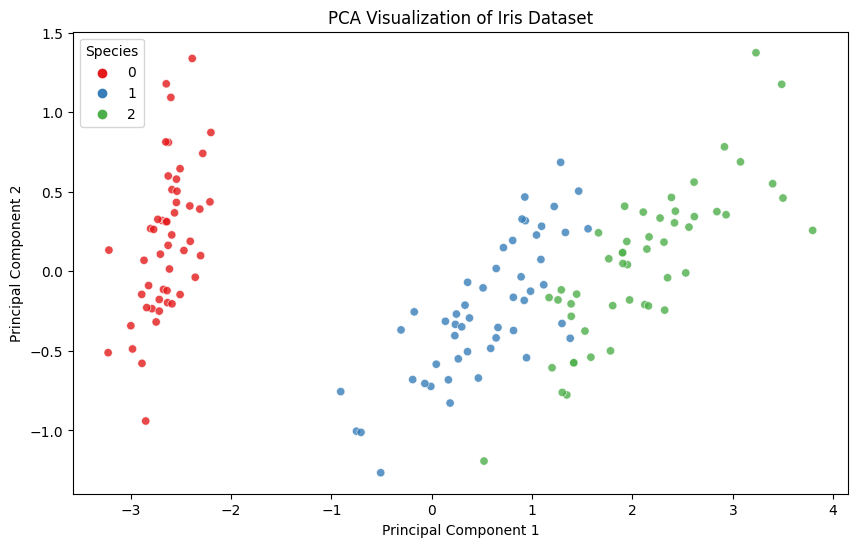

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2',hue=df['Species'],palette='Set1',data=df_pca, alpha=0.8)
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Species')
plt.show()